# Проект на тему: "Принятие решений в бизнесе"

# Описание проекта

Вместе с отделом маркетинга крупного интернет-магазина, проведена подготовка списка гипотез для увеличения выручки.  

Требуется провести приоритизацию гипотезы, провести A/B-тест и проанализиовать результаты.

# Описание данных

Данные для первой части:  
Файл /datasets/hypothesis.csv  
Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

Данные для второй части:    
Файл /datasets/orders.csv.    
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.  

Файл /datasets/visitors.csv.
date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста 

# Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

Загрузим исходные данные:

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Переведём название столбцов в нижний регистр.

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


В датефреймах /datasets/orders.csv и /datasets/visitors.csv. результаты A/B-теста.

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Приведем столбец date к типу datetime и проверим на дубликаты.

In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
orders.duplicated().sum()

0

In [11]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Приведем столбец date к типу datetime и проверим на дубликаты.

In [14]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [15]:
visitors.duplicated().sum()

0

## Вывод
Проведена загрузка и предобработка данных трёх таблиц:  
- Таблица hypothesis с гипотезами по увеличению выручки интернет-магазина. Состоит из 9 строк и 5 столбцов, название столбцов были переведены в нижний регистр.  
Две таблицы с результатами  A/B-тестов.
- Таблица orders с данными о заказах. Состоит из 1197 строк и 5 столбцов. Столбец data приведен к типу datetype, дубликаты отсутствуют.   
- Таблица visitors с количеством пользователей. Состоит из 62 строк и 3 столбцов. Столбец data приведен к типу datetype, дубликаты отсутствуют.  

# Приоритизация гипотез

## Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.  


In [16]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)

In [17]:
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0


## Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [18]:
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)

In [19]:
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0,3.0


## Вывод  
При использовании фреймворка ICE в лидерах по приоритету гипотезы: 8, 0 и 7.  
При использовании фреймворка RICE топ-3 по приоритету гипотезы: 7, 2 и 0.  
Такие результаты можно объяснить  тем, что у 8-ой гипотезы минимальное reach (количество пользователей затронет изменение), равный 1. Поэтому по фреймворку RICE 8-ая гипотеза занимает только 5-ое место.   
7-ая гипотеза имеет максимальное reach (10), поэтому она на первом месте по RICE.   
У 2-ой гипотезы, занявшее 2-ое место по фреймворку RICE высокое reach, равное 8.  

Исходя из полученных результатов, наиболее приоритетной является 7-ая гипотеза: 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'.

# Анализ A/B-теста

## Построение графика кумулятивной выручки по группам.

Создадим массив уникальных пар значений дат и групп теста

In [31]:
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Получим агрегированные кумулятивные по дням данные о заказах.

In [32]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1
).sort_values(
    by=['date','group']
)

Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [33]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1
).sort_values(
    by=['date','group']
)

Объединяем кумулятивные данные в одной таблице и переименуем столбцам.

In [34]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [35]:
print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:
Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

In [36]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

In [37]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Строим график выручки группы А и группы B

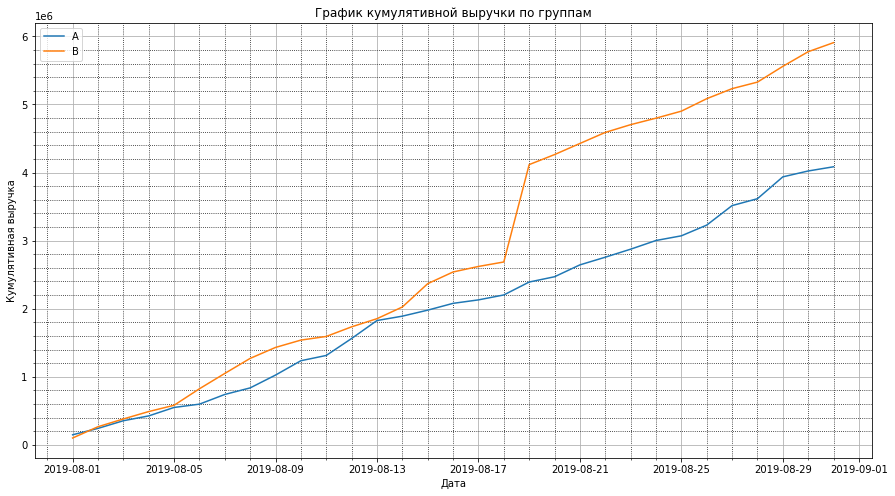

In [38]:
plt.figure(figsize=(15, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.legend();

До 5 августа выручка в обоих группах росла равномерно. С 5 по 13 августа в группе В рост выручки ускорился по сравнению с группой А, но 13 августа обе группы сравнялись. После чего группа А опять начала отставать. 19 августа в группе В произошёл резкий рост выручки, что может говорить о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

## Построение графика кумулятивного среднего чека по группам.

Чтобы получить кумулятивный средний чек по группам разделим кумулятивную выручку на кумулятивное число заказов.

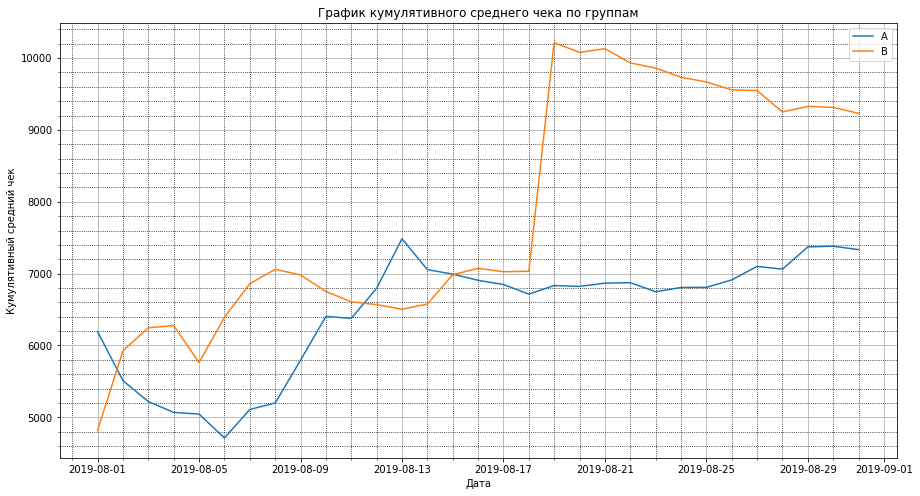

In [39]:
plt.figure(figsize=(15, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.legend();

До 18 августа наблюдается переменное лидерство групп А и В. 19 августа в группа В произошел резкий скачок среднего чека, после чего группа намного превышает группу А.

## Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

Cобираем данные в одном датафрейме.

In [40]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

Cтроим отношение средних чеков, с добавлением оси X.

Text(0.5, 0, 'Дата')

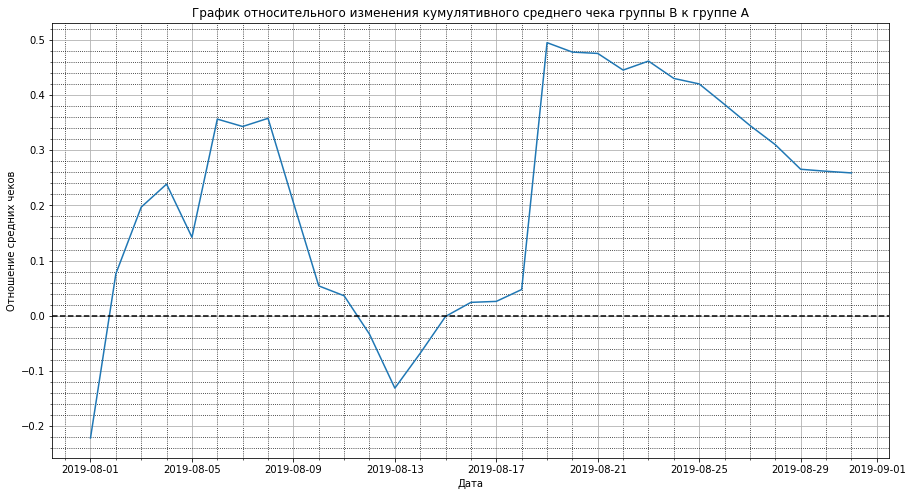

In [41]:
plt.figure(figsize=(15, 8))
plt.plot(
    mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Oтношение средних чеков')
plt.xlabel('Дата')

Средний чек группы B превысил чек группу А уже 2 августа и рос до 7 августа. С 7 по 13 августа средний чек группы В относительно среднего чека группы А  начал снижаться. 13 августа произошло обратное движение до всплеска 19 августа, после чего началось медленное снижение чека группы В.

## Построение графика кумулятивной конверсии по группам.

Рассчитаем кумулятивную конверсию.

In [42]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Отделяем данные по группе A и по группе B

In [43]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Строим графики

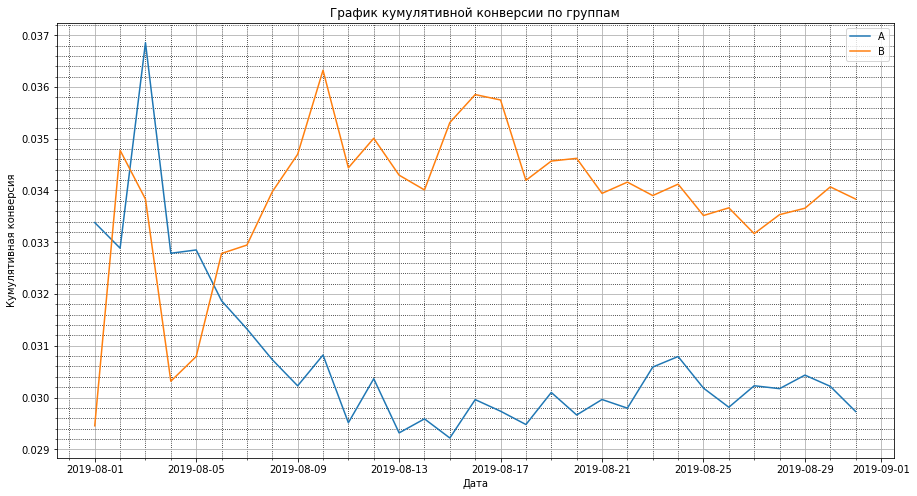

In [44]:
plt.figure(figsize=(15, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.legend()

С 3 августа конверсия группы А превышала конверсию групп В, но 6 августа конверсия группы В вырвалась вперед и стабильно закрепилась в лидерах.

## Построение графика относительного изменения кумулятивной конверсии группы B к группе A.

Text(0.5, 0, 'Дата')

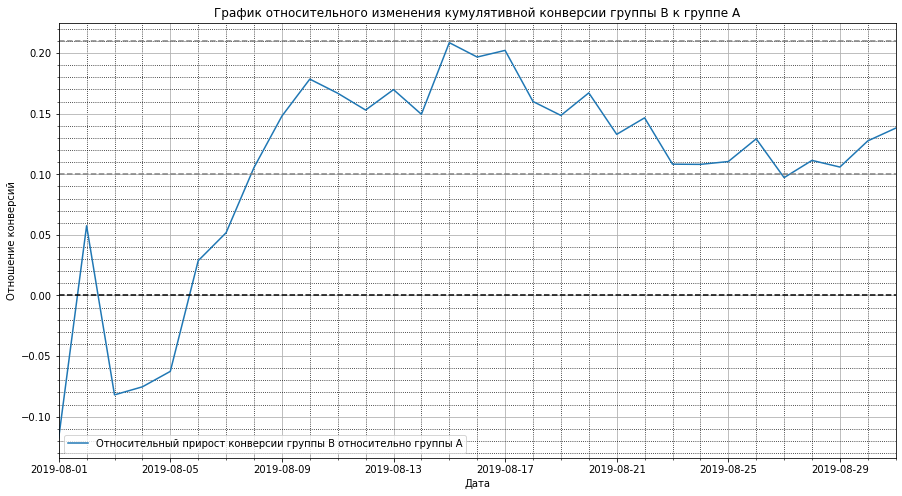

In [45]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.axhline(y=0, color='black', linestyle='--')
plt.axis(xmin=cumulativeDataA['date'].min(), xmax=cumulativeDataA['date'].max())
plt.axhline(y=0.10, color='grey', linestyle='--') 
plt.axhline(y=0.21, color='grey', linestyle='--') 
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.ylabel('Отношение конверсий')
plt.xlabel('Дата')

Аналогичная картина на графике относительного изменения кумулятивной конверсии групп. С 6 августа конверсия группы В стально лидирует. 15 августа был пик, конверсия группы В превысила конверсию группы А на 21%.

## Построение точечного графика количества заказов по пользователям.

Определим количество заказов по пользователям.

In [46]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Построим точечную диаграмму числа заказов на одного пользователя:

Text(0, 0.5, 'Количество заказов')

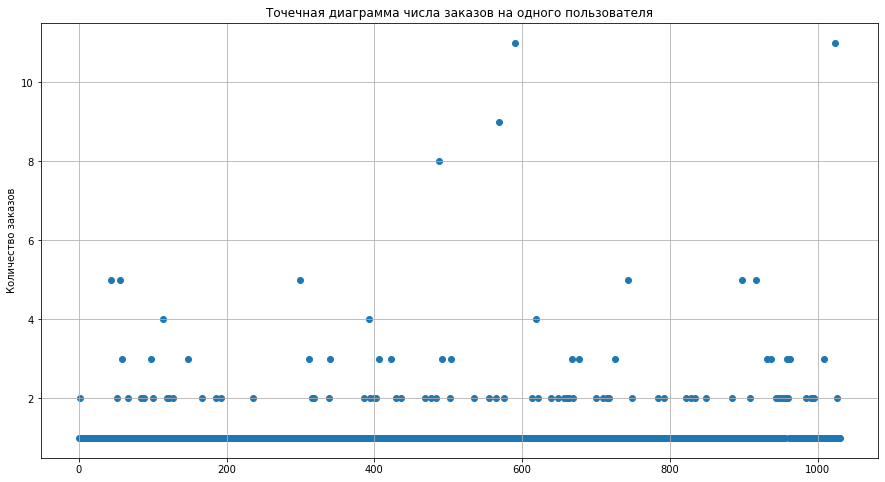

In [47]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15, 8))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.grid()
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Количество заказов')

Большинство покупателей заказывали только один раз. Также значительное количество пользователей с двумя заказами, с тремя заказами и более, пользоветелей намного меньше.

## Расчёт 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

Посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя:

In [48]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа и 1% пользователей заказывали более 4-ёх раз.
Выбрем 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеем аномальных пользователей по ней.

## Построение точечного графика стоимостей заказов.

Построим точечный график стоимостей заказов.

Text(0, 0.5, 'Стоимость заказа')

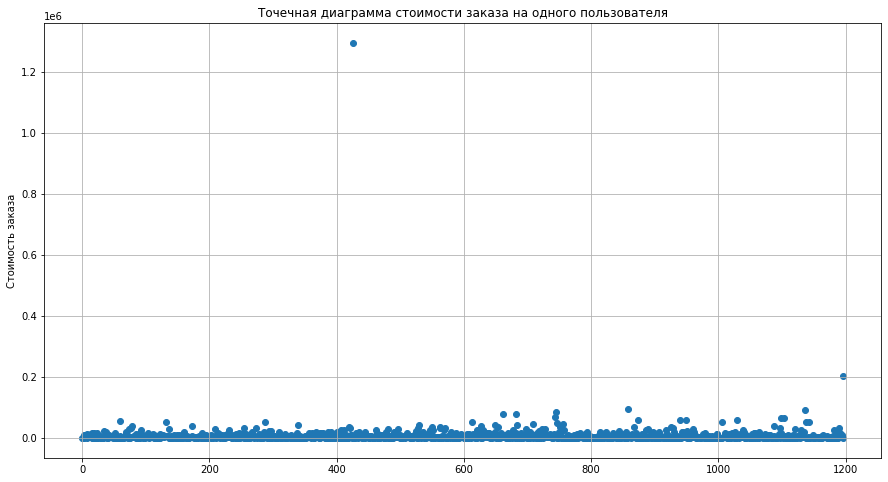

In [49]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15, 8))
plt.scatter(x_values, orders['revenue']) 
plt.grid()
plt.title('Точечная диаграмма стоимости заказа на одного пользователя')
plt.ylabel('Стоимость заказа')

Практически все заказы ниже 100000. Имеются два выброса, в районе 200000 и более 1,2 млн.

In [50]:
orders_filtered = orders.query('revenue < 1200000')

Text(0, 0.5, 'Стоимость заказа')

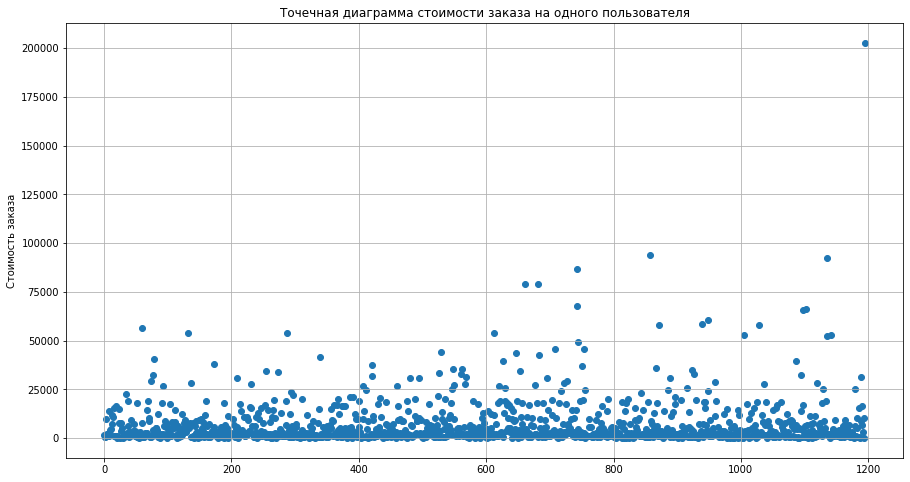

In [51]:
x_values = pd.Series(range(0,len(orders_filtered['revenue'])))
plt.figure(figsize=(15, 8))
plt.scatter(x_values, orders_filtered['revenue']) 
plt.grid()
plt.title('Точечная диаграмма стоимости заказа на одного пользователя')
plt.ylabel('Стоимость заказа')

Опрделим дату заказа с максимальной стоимостью

In [52]:
max_orders = orders.query('revenue > 1200000')

In [53]:
max_orders

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


Дата заказа - 19 августа, в группе В. Именно в эту дату, в этой группе отмечаются всплески на графиках кумулятивной выручки и кумулятивного среднего чека.

## Рассчёт 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.

Посчитаем 95-й и 99-й перцентили стоимости заказов:

In [54]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. Выбрем 28000 рублей за нижнюю границу стоимости заказов, и отсеем аномальных пользователей по этой границе.

## Расчёт статистической значимости различий в конверсии между группами по «сырым» данным.

Посчитаем статистическую значимость различий в конверсии группами по «сырым» данным — без удаления аномальных пользователей. Проверка будет осуществляться с помощью критерия Манна-Уитни.  
Сформулируем гипотезы.  
Нулевая H0: различий в конверсии между группами нет.  
Альтернативная H1: различия в конверсии между группами есть.  
Пороговый уровень статистической значимости alpha примем 0,05.

Подготовка данных

In [55]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Посчитаем статистическую значимость различия в конверсии между группами.  
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказ.

In [56]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

In [57]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.

In [58]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0
                   )

In [59]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0
                   )

Применим критерий Манна-Уитни, отформатируем p-value и выведем относительный прирост конверсии группы B, округлив оба значения до трёх знаков после запятой.

In [60]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f} - p-value'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f} - относительный прирост конверсии группы B'.format(sampleB.mean() / sampleA.mean() - 1))

0.017 - p-value
0.138 - относительный прирост конверсии группы B


p-value равно 0.017, что меньше порогового уровеня статистической значимости. Следовательно, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем и принимаем альтернативную гипотезу, что различия в конверсии между группами есть.
Относительный прирост конверсии группы B составил 13.8%.

## Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным — без удаления аномальных пользователей.  
Сформулируем гипотезы.  
Нулевая H0: различий в среднем чеке между группами нет.  
Альтернативная H1: различия в среднем чеке между группами есть.  
Пороговый уровень статистической значимости alpha примем 0,05.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
И найдём относительные различия в среднем чеке между группами

In [61]:
print('{0:.3f} - p-value'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f} - относительный прирост среднего чека группы B '.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729 - p-value
0.259 - относительный прирост среднего чека группы B 


p-value равен 0.729, что больше 0.05. Следовательно, нулевую гипотезу, что различий в среднем чеке между группами нет, мы отвергнуть не можем.  
Относительный прирост среднего чека группы B составил 25.9%.

## Расчёт статистической значимости различий в конверсии между группами по «очищенным» данным.

Как было определено выше за аномальных пользователей принимаем тех, кто совершил более 2 заказов или совершил заказ дороже 28000 рублей. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [62]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Всего аномальный пользователей - 74.

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [63]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [64]:
print('{0:.3f} - p-value'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f} - относительный прирост среднего чека группы B'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013 - p-value
0.173 - относительный прирост среднего чека группы B


p-value равно 0.013, что меньше 0.05. Следовательно, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем и принимаем альтернативную гипотезу, что различия в конверсии между группами есть.  
Относительный прирост конверсии группы B составил 17.3%.  

По сырым и по очищенным данным мы отвергаем нулевую гипотезу, что статистически значимых различий в конверсии между группами нет.   
Также по обоим группам данных виден относительный прирост конверсии группы B (13,8% и 17.3%).

## Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами теста по очищенным данным.

In [65]:
print(
    '{0:.3f} - p-value'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    '{0:.3f} - относительный прирост среднего чека группы B'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738 - p-value
-0.020 - относительный прирост среднего чека группы B


По очищенным данным p-value равен 0.738, что также больше 0.05. Следовательно, нулевую гипотезу, что различий в среднем чеке между группами нет, мы отвергнуть не можем. Как и в случае сырых данных.   
Но в отличиние от сырых данных, по очищенным наблюдается снижение среднего чека группы В, которое составило 2%.

# Решение по результатам теста и его объяснение.

## Вывод:  
- Обнаружена статистически значимое различие по конверсии между группами и по сырым и по очищенных данным;  
Прирост конверсии группы B составил по сырым и по очищенным данным 13,8% и 17.3% соответственно.

- Отсутствует статистически значимое различие по среднему чеку между группами ни по «сырым», ни по очищенных данным; 
Прирост среднего чека составил по сырым данным составил 25.9, по очищенным данным снижение среднего чека группы В на 2%.

- График различия конверсии между группами сообщает, что результаты группы B превышают результаты группы A на 14%.  

- По графику различия среднего чека видно, что результаты группы B превышают группу А на 28%.

Исходя из этого рекомендуется остановить тест и зафиксировать победу группы В.